In [24]:
import Random
import Statistics
import PyPlot as plt

In [25]:
# generating gaussian noise normalized to 1 with mean 0.5
resolution = 2^7 # looks more Gaussian the bigger this number is
noise_length = 2^13

noise_matrix = zeros(noise_length, resolution)
Random.rand!(noise_matrix)
noise_list = zeros(noise_length)

for (i, j) in enumerate(noise_list)
    noise_list[i] = sum(noise_matrix[i, :])
end
noise_list = noise_list ./ resolution .- 0.5

std_dev = Statistics.std(noise_list)
mean = Statistics.mean(noise_list)

println("Mean is $(mean), Standard Deviation is $(std_dev)")

Mean is 0.00013673345959680112, Standard Deviation is 0.025247019882212843


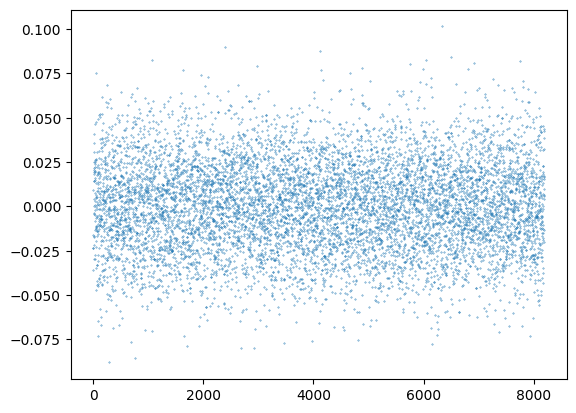

PyObject <matplotlib.collections.PathCollection object at 0x7f08aa910850>

In [26]:
plt.scatter(collect(1:noise_length), noise_list, s=.1)

In [27]:
xlim = (mean - 3 * std_dev, mean + 3 * std_dev)
distr_res = 0.005
distribution_x = collect(xlim[1]:distr_res:1xlim[2] - distr_res)
distribution_y = zeros(size(distribution_x))
for (i, j) in enumerate(distribution_x)
    for k in noise_list
        if j < k < j + distr_res
            distribution_y[i] += 1
        end
    end
end

distribution_y /= maximum(distribution_y)

    

30-element Vector{Float64}:
 0.009389671361502348
 0.0297339593114241
 0.03286384976525822
 0.07042253521126761
 0.09702660406885759
 0.1596244131455399
 0.25821596244131456
 0.3474178403755869
 0.460093896713615
 0.5586854460093896
 0.6572769953051644
 0.7621283255086072
 0.8951486697965572
 ⋮
 0.8294209702660407
 0.7151799687010955
 0.5758998435054773
 0.47104851330203446
 0.3568075117370892
 0.2535211267605634
 0.162754303599374
 0.12050078247261346
 0.07981220657276995
 0.051643192488262914
 0.03912363067292645
 0.012519561815336464

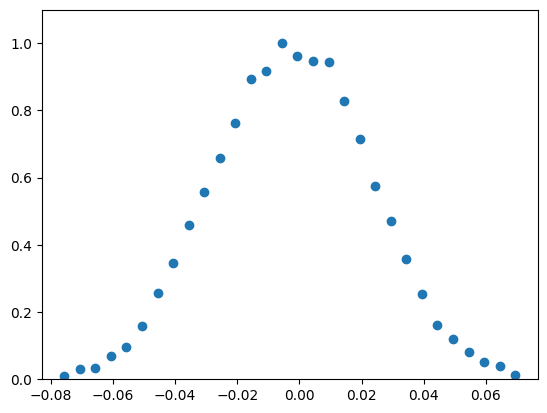

(0.0, 1.1)

In [28]:
plt.clf()

fig, ax = plt.subplots(1, 1)

ax.scatter(distribution_x, distribution_y)
ax.set_ylim((0, 1.1))